# HW 4 - Mehmetcan Tütüncü
## 1) Coin toss with a different prior
Given prior $p(\pi)=B(\alpha,\beta)$ the resulting update is
$$p(\pi | x) \sim p(\pi) \prod p(x_i|\pi)=B(\alpha+c_1,\beta + c_0)$$
Given prior $p(\pi)=\frac{B(3,20)+B(20,3)}{2}$ the resulting update is $$p(\pi) =\frac{B(20 + c_1,3 + c_0)+B(3 + c_1,20 + c_0)}{2}$$

1.72250368685


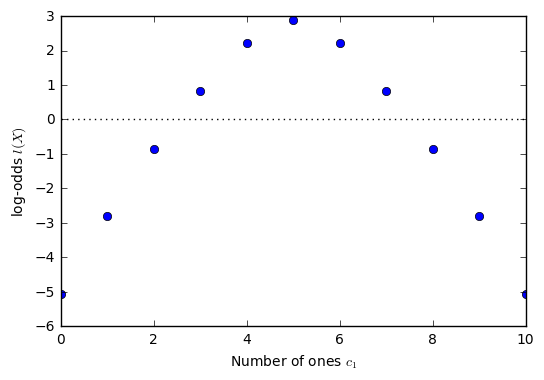

In [23]:
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt

def log_odds(c_0, c_1, a, b):
    # Total number of tosses
    N = c_0 + c_1
    
    M_fair = N*np.log(0.5)
    M_fake_1 = sps.gammaln(a+b) - sps.gammaln(a) - sps.gammaln(b) +  sps.gammaln(c_0+a) + sps.gammaln(c_1+b) - sps.gammaln(N+a + b)
    M_fake_2 = sps.gammaln(a+b) - sps.gammaln(a) - sps.gammaln(b) +  sps.gammaln(c_0+b) + sps.gammaln(c_1+a) - sps.gammaln(N+a + b)
    M_fake = np.log((np.exp(M_fake_1)+np.exp(M_fake_2) )/2) #new likelood is average likelihood of B(a,b) and B(b,a)
    return M_fair - M_fake
a = 3
b = 20
N = 10

l = np.zeros(N+1)

for c in range(0,N+1):
    l[c] = log_odds(N-c, c, a, b)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()



## 2)Changepoint

$$p(x | m,\pi_1,\pi_2) = BE(x;\pi_1)^{[i<m]} BE(x;\pi_2)^{[i< m]} = \pi_1^{x[i<m]}{(1-\pi_1)}^{(1-x)[i<m]}
\pi_2^{x[i\ge m]}{(1-\pi_2)}^{(1-x)[i\ge m]}$$

Marginalizing over $\pi_1$ , $\pi_2$ , we get the proportional vector as below.
$$p(m | x) \sim \iint_{\pi_1,\pi_2} \pi_1^{x[i<m]}{(1-\pi_1)}^{(1-x)[i<m]}
\pi_2^{x[i\ge m]}{(1-\pi_2)}^{(1-x)[i\ge m]}  \,du\,dv = \frac{\Gamma(c_{1,[x<m]}+1)\Gamma(c_{0,[x<m]}+1)}{\Gamma(m-1 +2)}\frac{\Gamma(c_{1,[x\ge m]}+1)\Gamma(c_{0,[x\ge m]}+1)}{\Gamma(n-m+1 + 2)}$$
Normalizing vector ,forcing sum to 1, we get probability vector $p( m | x )$

Most probable changepoint: 25
probability: 0.39736120985


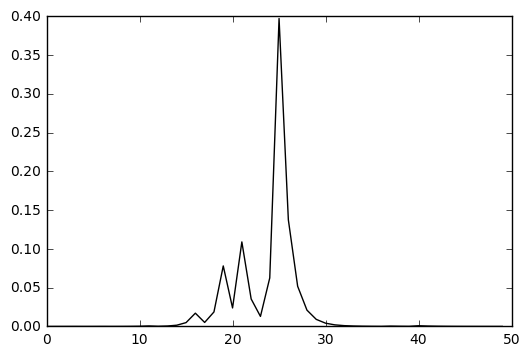

In [59]:
def M_given_x_to_be_normalized(x,m):
    part1= sps.gammaln(sum(x[0:(m-1)]=="1")+1) + sps.gammaln(sum(x[:(m-1)]=="0")+1) - sps.gammaln((m-1)+2)
    part2= sps.gammaln(sum(x[(m-1):]=="1")+1) + sps.gammaln(sum(x[(m-1):]=="0")+1) - sps.gammaln((len(x)-m+1) +2)
    return np.exp(part1+part2)
string= "0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1"
numbers = np.array(string.split())
probVector= [M_given_x_to_be_normalized(numbers,m) for m in range(numbers.size)]
probVector= probVector/sum(probVector)
print "Most probable changepoint: {}".format(probVector.argmax())
print("probability: {}".format(probVector.max()))

plt.plot(range(0,numbers.size),probVector,'k')
plt.show()

    